In [1]:
'''EDA of the Dataset'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


# Load and Inspect Data

In [2]:
#read data
df = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
#inspect data
df.head()
df.tail()

delta_ts = df.index[-1] - df.index[0]
print('The No. of datapoints is {}'.format(delta_ts))

The No. of datapoints is 7110


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111 entries, 0 to 7110
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_time               7111 non-null   object 
 1   deg_C                   7111 non-null   float64
 2   relative_humidity       7111 non-null   float64
 3   absolute_humidity       7111 non-null   float64
 4   sensor_1                7111 non-null   float64
 5   sensor_2                7111 non-null   float64
 6   sensor_3                7111 non-null   float64
 7   sensor_4                7111 non-null   float64
 8   sensor_5                7111 non-null   float64
 9   target_carbon_monoxide  7111 non-null   float64
 10  target_benzene          7111 non-null   float64
 11  target_nitrogen_oxides  7111 non-null   float64
dtypes: float64(11), object(1)
memory usage: 666.8+ KB


In [5]:
df.describe()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
count,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000
mean,20.878034,47.561004,1.110309,1091.572100,938.064970,883.903305,1513.238349,998.335565,2.086219,10.237083,204.066784
std,7.937917,17.398731,0.398950,218.537554,281.978988,310.456355,350.180310,381.537695,1.447109,7.694426,193.927723
min,1.300000,8.900000,0.198800,620.300000,364.000000,310.600000,552.900000,242.700000,0.100000,0.100000,1.900000
25%,14.900000,33.700000,0.855900,930.250000,734.900000,681.050000,1320.350000,722.850000,1.000000,4.500000,76.450000
50%,20.700000,47.300000,1.083500,1060.500000,914.200000,827.800000,1513.100000,928.700000,1.700000,8.500000,141.000000
75%,25.800000,60.800000,1.404150,1215.800000,1124.100000,1008.850000,1720.400000,1224.700000,2.800000,14.200000,260.000000
max,46.100000,90.800000,2.231000,2088.300000,2302.600000,2567.400000,2913.800000,2594.600000,12.500000,63.700000,1472.300000


In [6]:
pd.isnull(df).sum() > 0

date_time                 False
deg_C                     False
relative_humidity         False
absolute_humidity         False
sensor_1                  False
sensor_2                  False
sensor_3                  False
sensor_4                  False
sensor_5                  False
target_carbon_monoxide    False
target_benzene            False
target_nitrogen_oxides    False
dtype: bool

In [7]:
df.columns

Index(['date_time', 'deg_C', 'relative_humidity', 'absolute_humidity',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'],
      dtype='object')

In [8]:
df1 = df.copy()
df2 = df_test.copy()

## Split in X and y

In [9]:
#drop target values for X matrix
X = df1.drop(columns=['target_carbon_monoxide','target_benzene','target_nitrogen_oxides'])
X['date_time'] = X['date_time'].astype('datetime64[ns]')#.astype(np.int64)/10**9

print(type(X['date_time'].iloc[0]))

display(X)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2
...,...,...,...,...,...,...,...,...,...
7106,2010-12-31 20:00:00,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5
7107,2010-12-31 21:00:00,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4
7108,2010-12-31 22:00:00,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1
7109,2010-12-31 23:00:00,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3


In [10]:
XX = df2.copy()
XX['date_time'] = df2['date_time'].astype('datetime64[ns]')#.astype(np.int64)/10**9

In [11]:
#define y vectors with targets
y_CO = df1['target_carbon_monoxide']
y_B = df1['target_benzene']
y_NO = df1['target_nitrogen_oxides']

display(y_CO, y_B, y_NO)

0       2.5
1       2.1
2       2.2
3       2.2
4       1.5
       ... 
7106    1.3
7107    1.4
7108    1.6
7109    1.5
7110    1.4
Name: target_carbon_monoxide, Length: 7111, dtype: float64

0       12.0
1        9.9
2        9.2
3        9.7
4        6.4
        ... 
7106     5.1
7107     5.8
7108     5.2
7109     4.6
7110     4.1
Name: target_benzene, Length: 7111, dtype: float64

0       167.7
1        98.9
2       127.1
3       177.2
4       121.8
        ...  
7106    191.1
7107    221.3
7108    227.4
7109    199.8
7110    186.5
Name: target_nitrogen_oxides, Length: 7111, dtype: float64

## include columns

In [18]:
XX

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,hour
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1,0
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0,1
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8,2
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0,3
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3,4
...,...,...,...,...,...,...,...,...,...,...
2242,2011-04-04 10:00:00,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8,10
2243,2011-04-04 11:00:00,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0,11
2244,2011-04-04 12:00:00,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1,12
2245,2011-04-04 13:00:00,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5,13


In [25]:
XX['hour']=pd.to_datetime(df2['date_time']).dt.hour
XX['eveningtime'] = (XX['hour'] == 0) | ((XX['hour'] >=18) & (XX['hour'] <= 24))
XX['eveningtime'] = XX['eveningtime'].astype(int) 
XX['daytime'] = ((XX['hour'] >= 1) & (XX['hour'] <= 17))
XX['daytime'] = XX['daytime'].astype(int)
XX['dayweek'] = pd.to_datetime(XX['date_time']).dt.dayofweek

display(XX)

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,hour,daytime,dayweek,eveningtime
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1,0,0,5,1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0,1,1,5,0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8,2,1,5,0
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0,3,1,5,0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3,4,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,2011-04-04 10:00:00,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8,10,1,0,0
2243,2011-04-04 11:00:00,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0,11,1,0,0
2244,2011-04-04 12:00:00,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1,12,1,0,0
2245,2011-04-04 13:00:00,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5,13,1,0,0


In [26]:
X['hour']=pd.to_datetime(df['date_time']).dt.hour
X['eveningtime'] = (X['hour'] == 0) | ((X['hour'] >=18) & (X['hour'] <= 24))
X['eveningtime'] = X['eveningtime'].astype(int) 
X['daytime'] = ((X['hour'] >= 1) & (X['hour'] <= 17))
X['daytime'] = X['daytime'].astype(int)
X['dayweek'] = pd.to_datetime(X['date_time']).dt.dayofweek

display(X)

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,hour,eveningtime,daytime,dayweek
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,18,1,0,2
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,19,1,0,2
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,20,1,0,2
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,21,1,0,2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,22,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7106,2010-12-31 20:00:00,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,20,1,0,4
7107,2010-12-31 21:00:00,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,21,1,0,4
7108,2010-12-31 22:00:00,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,22,1,0,4
7109,2010-12-31 23:00:00,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,23,1,0,4


# Train-Test-Split

In [27]:
X_train, X_test, yCO_train, yCO_test = train_test_split(X,y_CO, random_state=31)
X_train, X_test, yB_train, yB_test = train_test_split(X,y_B, random_state=31)
X_train, X_test, yNO_train, yNO_test = train_test_split(X,y_NO, random_state=31)

# Validation Model

## CO

<AxesSubplot:>

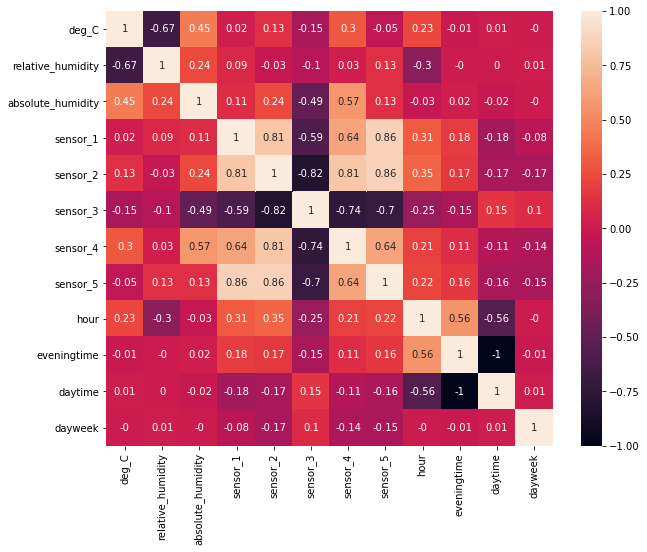

In [28]:
#heatmap 
plt.figure(figsize=(10,8))
sns.heatmap(round(X_train.corr(),2), annot=True)

In [29]:
X_train.drop(columns=['date_time'],inplace=True)
X_test.drop(columns=['date_time'],inplace=True)

/home/jana/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
param_grid = {'n_estimators':[100,120,150,200],
              'max_depth':[ 2, 3, 4 ,5]
             
             }
m1 = GridSearchCV(GradientBoostingRegressor(), param_grid, cv = 5, return_train_score=True)

In [40]:
m1.fit(X_train,yCO_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 120, 150, 200]},
             return_train_score=True)

In [41]:
m1.best_score_

0.915050167878589

In [42]:
m1.best_estimator_

GradientBoostingRegressor(max_depth=5, n_estimators=150)

In [43]:
results = pd.DataFrame(m1.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.695716,0.051722,0.002729,0.000180,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.891407,0.877749,0.875759,...,0.888984,0.010615,16,0.913790,0.913969,0.915466,0.911353,0.910827,0.913081,0.001735
1,0.912430,0.055824,0.003240,0.000254,2,120,"{'max_depth': 2, 'n_estimators': 120}",0.892445,0.879094,0.877985,...,0.890983,0.010918,15,0.918793,0.917864,0.919826,0.915846,0.914934,0.917453,0.001818
2,1.008102,0.037089,0.003088,0.000340,2,150,"{'max_depth': 2, 'n_estimators': 150}",0.892118,0.880254,0.879416,...,0.892080,0.011140,14,0.924462,0.922870,0.924558,0.921143,0.920337,0.922674,0.001708
3,1.404737,0.059909,0.003403,0.000159,2,200,"{'max_depth': 2, 'n_estimators': 200}",0.893044,0.883475,0.880283,...,0.893713,0.011094,13,0.931315,0.931062,0.930837,0.928335,0.927535,0.929817,0.001565
4,1.075178,0.070926,0.003428,0.000390,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.906107,0.892028,0.889102,...,0.901971,0.009903,12,0.938231,0.937539,0.940255,0.938675,0.936753,0.938291,0.001178


In [44]:
#heatmap 
scores = np.array(results['mean_test_score']).reshape(4,4)
display(results['mean_test_score'])

0     0.888984
1     0.890983
2     0.892080
3     0.893713
4     0.901971
5     0.903316
6     0.906481
7     0.908163
8     0.909988
9     0.910653
10    0.912032
11    0.913209
12    0.912508
13    0.913942
14    0.915050
15    0.914510
Name: mean_test_score, dtype: float64

<AxesSubplot:>

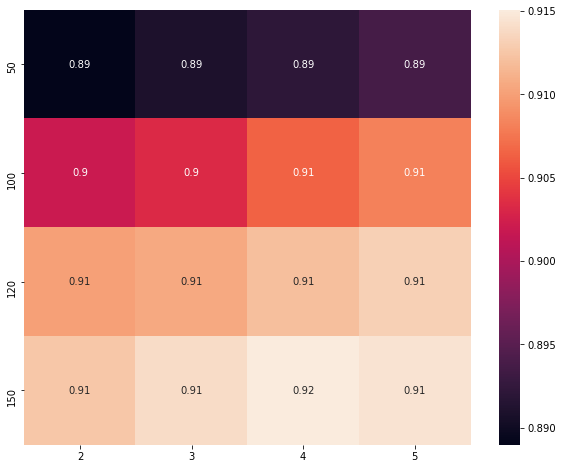

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(scores, annot=True, xticklabels=[2,3,4,5],yticklabels=[50,100,120,150])

In [63]:
m_CO = GradientBoostingRegressor(max_depth=5, n_estimators=150, learning_rate=0.09).fit(X_train,yCO_train)
res_features = m_CO.feature_importances_

Text(0.5, 0, 'Feature Importance')

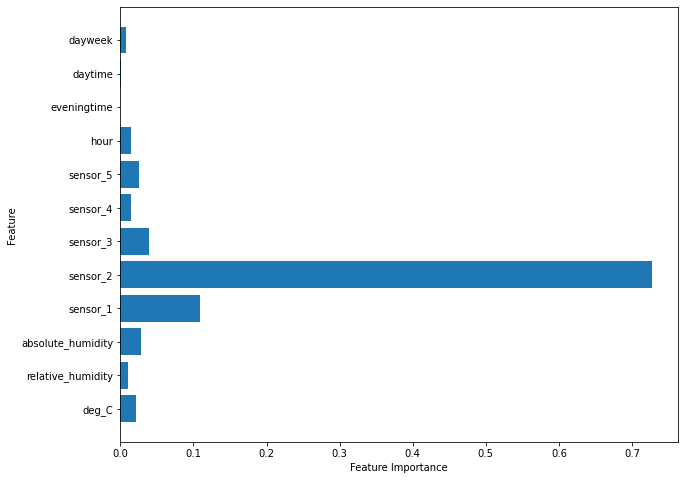

In [47]:
plt.figure(figsize=(10,8))
plt.barh(np.arange(X_train.shape[1]), res_features, align='center')
plt.yticks(np.arange(X_train.shape[1]), X_train.columns)
plt.ylabel('Feature')
plt.xlabel('Feature Importance')

In [64]:
pred_CO = m_CO.predict(X_test)
print('MSE: {}'.format(mean_squared_error(pred_CO,yCO_test)))

MSE: 0.15148708122058457


## Benzene

In [65]:
param_grid = {'n_estimators':[100,120,150,200],
              'max_depth':[ 2, 3, 4 ,5]
             
             }
m2 = GridSearchCV(GradientBoostingRegressor(), param_grid, cv = 5, return_train_score=True)

In [66]:
m2.fit(X_train,yB_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 120, 150, 200]},
             return_train_score=True)

In [68]:
m2.best_score_

0.9769093124091628

In [69]:
m2.best_estimator_

GradientBoostingRegressor(max_depth=4, n_estimators=200)

In [70]:
results = pd.DataFrame(m2.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.706498,0.048162,0.002722,0.000266,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.974092,0.974303,0.975330,...,0.973676,0.001765,16,0.980501,0.980475,0.980244,0.980455,0.980285,0.980392,0.000106
1,0.876045,0.062963,0.002804,0.000287,2,120,"{'max_depth': 2, 'n_estimators': 120}",0.974512,0.974559,0.975377,...,0.973963,0.001677,15,0.981134,0.981040,0.980905,0.981074,0.980902,0.981011,0.000093
2,1.063160,0.079736,0.003364,0.000420,2,150,"{'max_depth': 2, 'n_estimators': 150}",0.974882,0.975293,0.976300,...,0.974516,0.001860,14,0.981871,0.981852,0.981747,0.981956,0.981687,0.981822,0.000095
3,1.458823,0.032896,0.003583,0.000291,2,200,"{'max_depth': 2, 'n_estimators': 200}",0.975268,0.976074,0.976533,...,0.975062,0.001679,13,0.983076,0.983073,0.982906,0.983230,0.982773,0.983011,0.000157
4,1.104825,0.083904,0.003583,0.000254,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.975437,0.976275,0.976867,...,0.975514,0.001078,12,0.983960,0.984191,0.983892,0.984588,0.983981,0.984122,0.000253


In [71]:
#heatmap 
scores = np.array(results['mean_test_score']).reshape(4,4)
display(results['mean_test_score'])

0     0.973676
1     0.973963
2     0.974516
3     0.975062
4     0.975514
5     0.975822
6     0.976180
7     0.976408
8     0.976381
9     0.976738
10    0.976839
11    0.976909
12    0.976436
13    0.976713
14    0.976661
15    0.976517
Name: mean_test_score, dtype: float64

<AxesSubplot:>

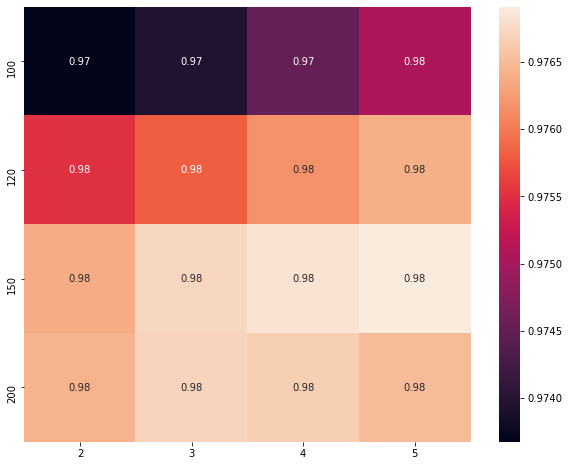

In [72]:
plt.figure(figsize=(10,8))
sns.heatmap(scores, annot=True, xticklabels=[2,3,4,5],yticklabels=[100,120,150,200])

In [86]:
m_B = GradientBoostingRegressor(max_depth=4, n_estimators=200, learning_rate=.12).fit(X_train,yB_train)
res_features = m_B.feature_importances_

Text(0.5, 0, 'Feature Importance')

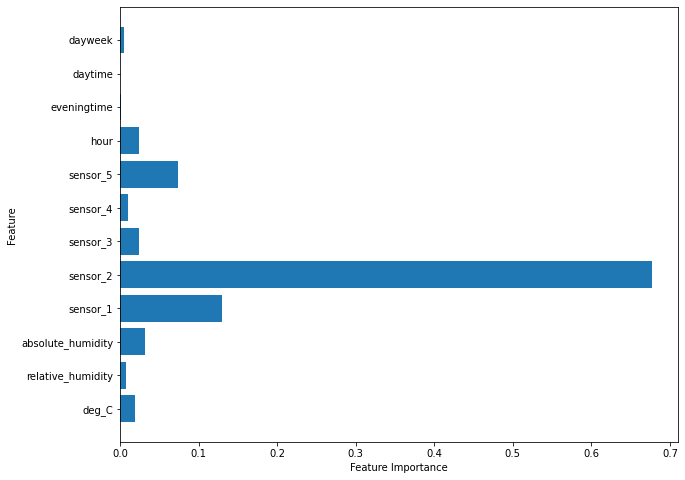

In [74]:
plt.figure(figsize=(10,8))
plt.barh(np.arange(X_train.shape[1]), res_features, align='center')
plt.yticks(np.arange(X_train.shape[1]), X_train.columns)
plt.ylabel('Feature')
plt.xlabel('Feature Importance')

In [87]:
pred_B = m_B.predict(X_test)
print('MSE: {}'.format(mean_squared_error(pred_B,yB_test)))

MSE: 1.3044749273125764


## NO

In [107]:
param_grid = {'n_estimators':[100,120,150,250],
              'max_depth':[ 2, 3, 4 ,5]
             
             }
m3 = GridSearchCV(GradientBoostingRegressor(), param_grid, cv = 5, return_train_score=True)

In [108]:
m3.fit(X_train,yNO_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 120, 150, 250]},
             return_train_score=True)

In [109]:
m3.best_score_

0.8605090954333617

In [110]:
m3.best_estimator_

GradientBoostingRegressor(max_depth=5, n_estimators=250)

In [111]:
results = pd.DataFrame(m3.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.786210,0.028589,0.003244,0.000234,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.786014,0.801148,0.776479,...,0.798042,0.016481,16,0.840517,0.838498,0.843457,0.836783,0.831487,0.838148,0.004004
1,0.796626,0.021478,0.002816,0.000262,2,120,"{'max_depth': 2, 'n_estimators': 120}",0.791771,0.808504,0.779952,...,0.803781,0.016844,15,0.849016,0.849956,0.855518,0.846707,0.843136,0.848867,0.004073
2,1.111657,0.038914,0.003184,0.000186,2,150,"{'max_depth': 2, 'n_estimators': 150}",0.799731,0.815289,0.787693,...,0.810976,0.016384,14,0.860801,0.861687,0.866813,0.858789,0.855484,0.860715,0.003721
3,1.923243,0.134261,0.004198,0.000183,2,250,"{'max_depth': 2, 'n_estimators': 250}",0.817439,0.825970,0.796326,...,0.822767,0.015641,13,0.884372,0.885614,0.889597,0.884144,0.880768,0.884899,0.002846
4,1.036216,0.069111,0.003379,0.000474,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.817522,0.826682,0.806602,...,0.827769,0.018813,12,0.894994,0.892499,0.896857,0.893057,0.887726,0.893027,0.003063


In [112]:
#heatmap 
scores = np.array(results['mean_test_score']).reshape(4,4)
display(results['mean_test_score'])

0     0.798042
1     0.803781
2     0.810976
3     0.822767
4     0.827769
5     0.833642
6     0.836453
7     0.844695
8     0.849888
9     0.852817
10    0.852943
11    0.854861
12    0.856485
13    0.857963
14    0.859117
15    0.860509
Name: mean_test_score, dtype: float64

<AxesSubplot:>

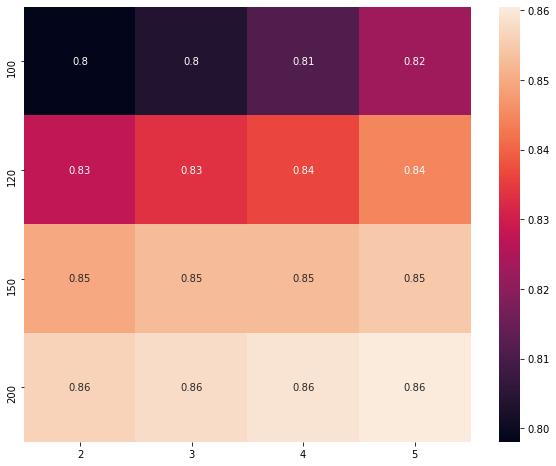

In [114]:
plt.figure(figsize=(10,8))
sns.heatmap(scores, annot=True, xticklabels=[2,3,4,5],yticklabels=[100,120,150,200])

In [129]:
m_NO = GradientBoostingRegressor(max_depth=5, n_estimators=250, learning_rate=0.1).fit(X_train,yNO_train)
res_features = m_NO.feature_importances_

Text(0.5, 0, 'Feature Importance')

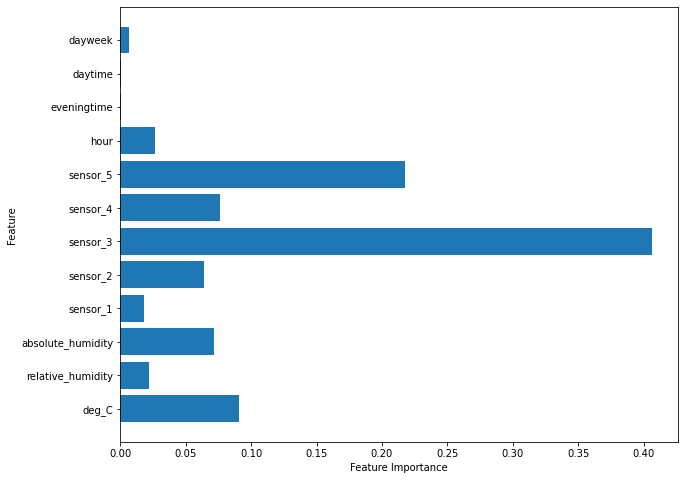

In [115]:
plt.figure(figsize=(10,8))
plt.barh(np.arange(X_train.shape[1]), res_features, align='center')
plt.yticks(np.arange(X_train.shape[1]), X_train.columns)
plt.ylabel('Feature')
plt.xlabel('Feature Importance')

In [130]:
pred_NO = m_NO.predict(X_test)
print('MSE: {}'.format(mean_squared_error(pred_NO,yNO_test)))

MSE: 4622.5024661156285


# Model and Prediction

In [135]:
X.drop(columns=['date_time'],inplace=True)
XX.drop(columns=['date_time'],inplace=True)

## CO

In [137]:
model_CO = GradientBoostingRegressor(max_depth=5, n_estimators=150, learning_rate=0.09)
model_CO.fit(X,y_CO)
pred_CO = model_CO.predict(XX)
pred_CO = np.clip(pred_CO,y_CO.min(),y_CO.max())

display(pred_CO)

array([1.42211923, 1.28369394, 1.80512456, ..., 2.60415859, 1.94329665,
       2.06157363])

# Benzene

In [138]:
model_B = GradientBoostingRegressor(max_depth=4, n_estimators=200, learning_rate=.12)
model_B.fit(X,y_B)
pred_B = model_B.predict(XX)
pred_B = np.clip(pred_B,y_B.min(),y_B.max())

display(pred_B)

array([ 5.03509491,  7.34706334,  7.45413986, ..., 12.97725324,
       11.10224763, 12.47025054])

# NO

In [139]:
model_NO = GradientBoostingRegressor(max_depth=5, n_estimators=250, learning_rate=0.1)
model_NO.fit(X,y_NO)
pred_NO = model_NO.predict(XX)
pred_NO = np.clip(pred_NO,y_NO.min(),y_NO.max())

display(pred_NO)

array([231.66344597, 511.27842214, 351.79853369, ..., 295.62402456,
       269.06186223, 238.67639705])

# Submission

In [141]:
sub = pd.read_csv('./data/sample_submission.csv')
display(sub)

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,2.0,10.0,300.0
1,2011-01-01 01:00:00,2.0,10.0,300.0
2,2011-01-01 02:00:00,2.0,10.0,300.0
3,2011-01-01 03:00:00,2.0,10.0,300.0
4,2011-01-01 04:00:00,2.0,10.0,300.0
...,...,...,...,...
2242,2011-04-04 10:00:00,2.0,10.0,300.0
2243,2011-04-04 11:00:00,2.0,10.0,300.0
2244,2011-04-04 12:00:00,2.0,10.0,300.0
2245,2011-04-04 13:00:00,2.0,10.0,300.0


In [143]:
sub_01 = sub.copy()

sub_01['target_carbon_monoxide'] = pred_CO
sub_01['target_benzene'] = pred_B
sub_01['target_nitrogen_oxides'] = pred_NO

display(sub_01)

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,1.422119,5.035095,231.663446
1,2011-01-01 01:00:00,1.283694,7.347063,511.278422
2,2011-01-01 02:00:00,1.805125,7.454140,351.798534
3,2011-01-01 03:00:00,1.894859,8.327356,365.931057
4,2011-01-01 04:00:00,1.290467,6.857750,235.565363
...,...,...,...,...
2242,2011-04-04 10:00:00,2.758663,14.229828,454.880386
2243,2011-04-04 11:00:00,2.427783,11.102929,357.440195
2244,2011-04-04 12:00:00,2.604159,12.977253,295.624025
2245,2011-04-04 13:00:00,1.943297,11.102248,269.061862


In [147]:
sub_01 = sub_01.set_index('date_time')

In [148]:
#sub_01.to_csv('submission.csv')

public score:0.27850